In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split

from sklearn.ensemble import RandomForestClassifier

from sklearn.preprocessing import MinMaxScaler


In [2]:
import xgboost as xgb

In [3]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import top_k_accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score

In [4]:

from sklearn.preprocessing import KBinsDiscretizer
from sklearn.preprocessing import MaxAbsScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

In [5]:
import seaborn as sns
sns.set_style("whitegrid")

In [6]:
state = 'AL'

In [7]:
file_symptoms_train = 'comments/raw_comments/agent_comments_'+state+\
                        '_filtered_final_joined_selected_columns_use_max_scale_one_df_train.fea'

noun_sentence_state_train = pd.read_feather(file_symptoms_train)

In [8]:
file_symptoms_test = 'comments/raw_comments/agent_comments_'+state+\
                        '_filtered_final_joined_selected_columns_use_max_scale_one_df_test.fea'
noun_sentence_state_test = pd.read_feather(file_symptoms_test)


In [9]:
noun_sentence_state_test_transdate_train = noun_sentence_state_train.groupby('Transdate').mean()[['avmerror']].reset_index()
noun_sentence_state_test_transdate_train = noun_sentence_state_test_transdate_train.rename(columns={"avmerror": "avmerror_mean"})

In [10]:
noun_sentence_state_test_transdate_test = noun_sentence_state_test.groupby('Transdate').mean()[['avmerror']].reset_index()
noun_sentence_state_test_transdate_test = noun_sentence_state_test_transdate_test.rename(columns={"avmerror": "avmerror_mean"})

In [11]:
noun_sentence_state_train = noun_sentence_state_train.merge(noun_sentence_state_test_transdate_train,
                                                         how='left', left_on='Transdate', right_on='Transdate')

In [12]:
noun_sentence_state_test = noun_sentence_state_test.merge(noun_sentence_state_test_transdate_test,
                                                         how='left', left_on='Transdate', right_on='Transdate')

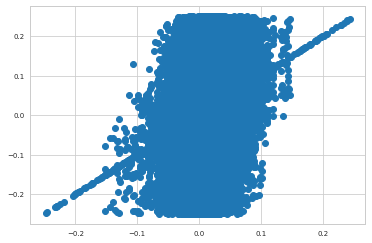

In [13]:

plt.plot(noun_sentence_state_train.avmerror_mean.values,noun_sentence_state_train.avmerror.values,'o')

In [14]:
selcted_columns = ['cbsa', 'Transdate', 
       'cj_living_area', 'census_tract', 'zip', 
       'avmValue', 
       'AVM_Error_Indicators_0', 'AVM_Error_Indicators_1',
       'AVM_Error_Indicators_2', 'AVM_Error_Indicators_3',
       'AVM_Error_Indicators_4', 'AVM_Error_Indicators_5',
       'AVM_Error_Indicators_6', 'AVM_Error_Indicators_7',
       'AVM_Error_Indicators_8', 'AVM_Error_Indicators_9',
       'AVM_Error_Indicators_10', 'AVM_Error_Indicators_11',
       'AVM_Error_Indicators_scale', 'AVM_Error_Indicators_scale_inverse',
       'Listing_Error_Indicators_0', 'Listing_Error_Indicators_1',
       'Listing_Error_Indicators_2', 'Listing_Error_Indicators_3',
       'Listing_Error_Indicators_4', 'Listing_Error_Indicators_5',
       'Listing_Error_Indicators_6', 'Listing_Error_Indicators_7',
       'Listing_Error_Indicators_8', 'Listing_Error_Indicators_9',
       'Listing_Error_Indicators_10', 'Listing_Error_Indicators_11',
       'AVM_Error_Indicators_0_max_value',
       'AVM_Error_Indicators_0_min_value',
       'AVM_Error_Indicators_0_max_indicator',
       'AVM_Error_Indicators_0_min_indicator',
       'AVM_Error_Indicators_0_diff_indicator',
       'AVM_Error_Indicators_0_diff_value', 'AVM_Error_Indicators_0_mean','avmerror_mean']

In [29]:
selcted_columns = selcted_columns + list(noun_sentence_state_train.columns[51:-1])

In [30]:
symptoms_df = noun_sentence_state_train.loc[:,selcted_columns]
symptoms_df_test = noun_sentence_state_test.loc[:,selcted_columns]

In [31]:
noun_sentence_state_train['category_predictand'] = 0
noun_sentence_state_train.loc[noun_sentence_state_train['avmerror']>=0.,'category_predictand'] = 1

In [32]:
noun_sentence_state_test['category_predictand'] = 0
noun_sentence_state_test.loc[noun_sentence_state_test['avmerror']>=0.,'category_predictand'] = 1

In [33]:
Predictors = symptoms_df.to_numpy()
X_test = symptoms_df_test.to_numpy()
X_train = Predictors
predictand = noun_sentence_state_train.category_predictand.values
y_train = predictand
y_test = noun_sentence_state_test.category_predictand.values

In [49]:

from xgboost import XGBClassifier
#model = XGBClassifier(colsample_bytree = 0.2, learning_rate = 0.05,
#                max_depth = 50, n_estimators = 100)


model = XGBClassifier(colsample_bytree = 0.6, learning_rate = 0.02,
                max_depth = 12, n_estimators = 100)

model = XGBClassifier(colsample_bytree = 0.7, learning_rate = 0.02,
                max_depth = 12, n_estimators = 100)

model = XGBClassifier(colsample_bytree = 0.7, learning_rate = 0.015,
                max_depth = 14, n_estimators = 150)

In [50]:
model.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.7, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.015, max_delta_step=0, max_depth=14,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=150, n_jobs=0, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [51]:
print(model.get_params(deep=True))

{'objective': 'binary:logistic', 'base_score': 0.5, 'booster': 'gbtree', 'colsample_bylevel': 1, 'colsample_bynode': 1, 'colsample_bytree': 0.7, 'gamma': 0, 'gpu_id': -1, 'importance_type': 'gain', 'interaction_constraints': '', 'learning_rate': 0.015, 'max_delta_step': 0, 'max_depth': 14, 'min_child_weight': 1, 'missing': nan, 'monotone_constraints': '()', 'n_estimators': 150, 'n_jobs': 0, 'num_parallel_tree': 1, 'random_state': 0, 'reg_alpha': 0, 'reg_lambda': 1, 'scale_pos_weight': 1, 'subsample': 1, 'tree_method': 'exact', 'validate_parameters': 1, 'verbosity': None}


In [52]:
predictions_train = model.predict(X_train)
predictions_train_prob = model.predict_proba(X_train)

In [53]:
cm_train = confusion_matrix(y_train, predictions_train)
print(cm_train)

[[45027 10588]
 [ 3647 66420]]


In [54]:
accuracy_score(y_train, predictions_train)

0.8867379577027736

In [55]:
predictions_test = model.predict(X_test)
predictions_test_prob = model.predict_proba(X_test)

In [56]:
cm_test = confusion_matrix(y_test, predictions_test)
print(cm_test)

[[12835 11147]
 [ 7142 22741]]


In [57]:
accuracy_score(y_test, predictions_test)

0.6604659797642254

In [39]:
import joblib
filename = 'XG_binaryclass_firstStage.sav'
joblib.dump(model,filename)

['XG_binaryclass_firstStage.sav']

## Regression

In [58]:
y_train_regressor = noun_sentence_state_train.avmerror.values

In [86]:


from xgboost import XGBRegressor
#model = LGBMClassifier(max_depth =50)  #0.6408242829295461
model_regressor = XGBRegressor(colsample_bytree = 0.7, learning_rate = 0.04,
                max_depth = 12, n_estimators = 100)

In [87]:
model_regressor.fit(X_train, y_train_regressor)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.7, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.04, max_delta_step=0, max_depth=12,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [88]:
predictions_train_Regressor = model_regressor.predict(X_train)

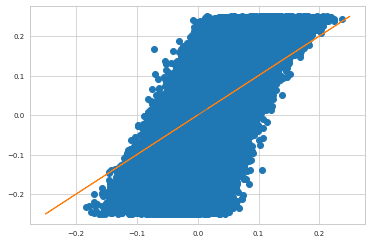

In [89]:
plt.plot(predictions_train_Regressor, y_train_regressor, 'o')
plt.plot(y_train_regressor, y_train_regressor)

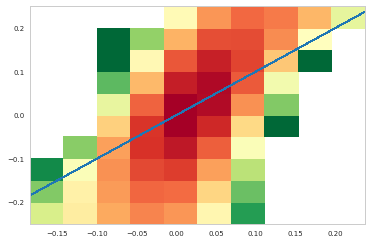

In [90]:
from matplotlib import colors
plt.hist2d(predictions_train_Regressor, y_train_regressor, bins=10, cmap = "RdYlGn_r",
           norm = colors.LogNorm())
plt.plot(y_train_regressor,y_train_regressor)

In [91]:
predictions_test_Regressor = model_regressor.predict(X_test)

In [92]:
y_test_regressor = noun_sentence_state_test.avmerror.values

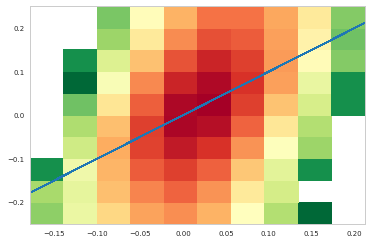

In [93]:
plt.hist2d(predictions_test_Regressor, y_test_regressor, bins=10, cmap = "RdYlGn_r",
           norm = colors.LogNorm())
plt.plot(y_test_regressor,y_test_regressor)

In [94]:
avmValue_test = noun_sentence_state_test['avmValue']
avmValue_train = noun_sentence_state_train['avmValue']

transprice_test = noun_sentence_state_test['Transprice']
transprice_train = noun_sentence_state_train['Transprice']

predictions_test_valueR = avmValue_test/(1-predictions_test_Regressor)
predictions_train_valueR = avmValue_train/(1-predictions_train_Regressor)

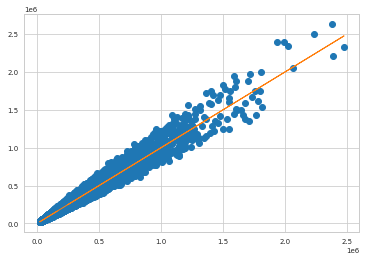

In [95]:
print('') 
fig = plt.figure()
plt.plot(predictions_test_valueR, 
     transprice_test,'o')
plt.plot(predictions_test_valueR,predictions_test_valueR)


In [96]:
print('') 
print('Testing')
print(np.mean(np.abs(transprice_test-predictions_test_valueR)/\
          (transprice_test)))
print(np.mean(np.abs(transprice_test - avmValue_test)/\
              (transprice_test)))

print('') 
print('Training') 
print(np.mean(np.abs(transprice_train-predictions_train_valueR)/\
          (transprice_train)))
print(np.mean(np.abs(transprice_train - avmValue_train)/\
              (transprice_train)))  


Testing
0.07592258759911787
0.08478161680856702

Training
0.06442055709706093
0.08446467748384286
